## House Price Prediction Using ML Algorithms
### @author: Raviteja Madishetty
### Student ID: 19022447

#### Applied ML algorithms ",

- Linear Regression
- Xgboost Regressor
- Gradient Boosting Regressor
- RandomForestRegressor


# Importing the necessary Packages 

In [8]:
#install these modules if not found error occurs

# import sys

# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install catboost

In [9]:
#!{sys.executable} -m pip install catboost

In [1]:
#importing the packages 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
import warnings
warnings.filterwarnings('ignore')

# Loading the data 

In [2]:
#reading the csv files using pandas

data=pd.read_csv("C://Users//madis//Melbourne_housing_FULL.csv")

In [3]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


# Performing sanity checks 

In [4]:
# showing the no of rows and columns in dataframe 

data.shape

(34857, 21)

In [5]:
# checking for the no of duplicated results present in the dataset.

data.duplicated().sum()

1

In [6]:
# dropping the duplicate records

data=data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
# showing the total columns with names 
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
#datatypes for each column 

data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [10]:
# checking the information about the dataset like datatype and null and count 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null object
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

# Finding the missing values and if present replacing or dropping them accordingly

In [11]:
# checking whether there is any missing values are there in the dataset 
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

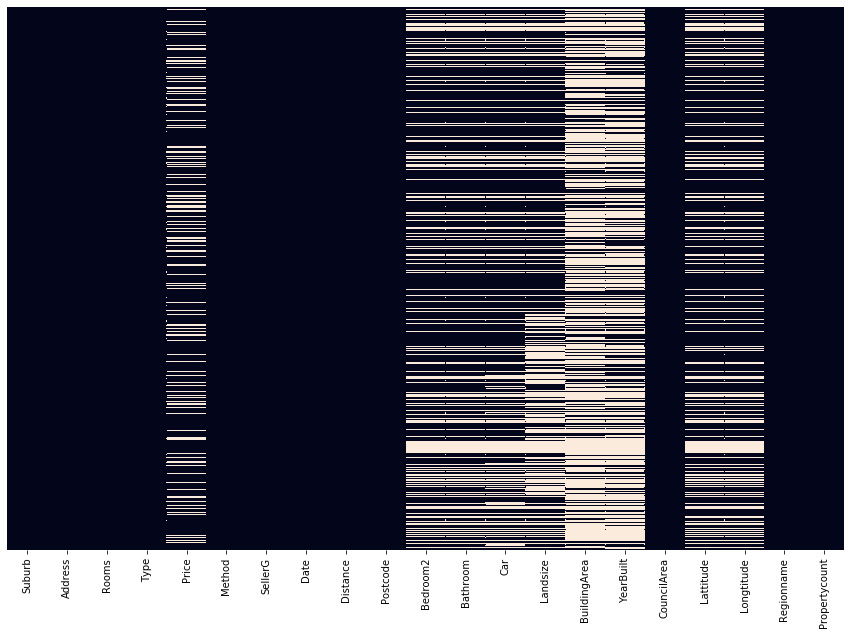

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False)
plt.show()

In [13]:
# percentage of null values 
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

Dropping the rows with most null values

In [14]:
data.dropna(subset=['CouncilArea','Lattitude', 'Longtitude', 'Regionname', 'YearBuilt'], inplace= True)

In [15]:
data['Price'].fillna(data['Price'].mean(), inplace= True)
data['Landsize'].fillna(data['Landsize'].mean(), inplace= True)
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace= True)
data['Bathroom'].fillna(data['Bathroom'].value_counts().index[0], inplace= True)
data['Car'].fillna(data['Car'].value_counts().index[0], inplace= True)

In [16]:
data.shape

(15541, 21)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,15541.0,3.108359e+00,0.986509,1.00000,2.0000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15541.0,1.077469e+06,591885.507987,85000.00000,700000.0000,1.077469e+06,1.190000e+06,9.000000e+06
Distance,15541.0,1.115133e+01,6.944742,0.00000,6.3000,1.010000e+01,1.400000e+01,4.810000e+01
Postcode,15541.0,3.117064e+03,115.189416,3000.00000,3047.0000,3.101000e+03,3.155000e+03,3.978000e+03
Bedroom2,15541.0,3.090213e+00,1.008762,0.00000,2.0000,3.000000e+00,4.000000e+00,3.000000e+01
Bathroom,15541.0,1.670098e+00,0.735022,0.00000,1.0000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15541.0,1.708513e+00,0.993530,0.00000,1.0000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15541.0,5.315755e+02,989.448563,0.00000,231.0000,5.315755e+02,6.420000e+02,4.280000e+04
BuildingArea,15541.0,1.539139e+02,82.099144,0.00000,108.0000,1.500000e+02,1.750000e+02,3.112000e+03
YearBuilt,15541.0,1.965278e+03,37.316569,1196.00000,1940.0000,1.970000e+03,2.000000e+03,2.106000e+03


The statistical summary revealed minimum values of zero for Landsize and BuildingArea that seem odd. Also, there is a max price of $8.4 million in the dataset. These observations will need to be investigated further to determine their validity and whether they should be included in the dataset for analysis.

# Data Pre-Procesing like cleaning and changing the datatypes

In [18]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [19]:
categorical = data.select_dtypes(exclude = [np.number])
numerical = data.select_dtypes(include = [np.number])

In [20]:
for colname in categorical:
    data[colname] = data[colname].astype('category')  

In [21]:
#  here the post code neede to be ctegory but it is defined as continous .Convert numeric variables to categorical
num_cat = ['Postcode']  

for colname in num_cat:
    data[colname] = data[colname].astype('category')   

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15541 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           15541 non-null category
Address          15541 non-null category
Rooms            15541 non-null int64
Type             15541 non-null category
Price            15541 non-null float64
Method           15541 non-null category
SellerG          15541 non-null category
Date             15541 non-null category
Distance         15541 non-null float64
Postcode         15541 non-null category
Bedroom2         15541 non-null float64
Bathroom         15541 non-null float64
Car              15541 non-null float64
Landsize         15541 non-null float64
BuildingArea     15541 non-null float64
YearBuilt        15541 non-null float64
CouncilArea      15541 non-null category
Lattitude        15541 non-null float64
Longtitude       15541 non-null float64
Regionname       15541 non-null category
Propertycount    15541 non-null float64
dtypes: category(9), float64(11), int64(1)
m

In [23]:
data['Rooms']

2        2
4        3
6        4
7        4
8        2
        ..
34849    3
34850    3
34853    2
34854    2
34856    2
Name: Rooms, Length: 15541, dtype: int64

In [24]:
data['Bedroom2']

2        2.0
4        3.0
6        3.0
7        3.0
8        4.0
        ... 
34849    3.0
34850    3.0
34853    2.0
34854    2.0
34856    2.0
Name: Bedroom2, Length: 15541, dtype: float64

In [25]:
data['Rooms'] = data['Rooms'].astype('float64')

In [26]:
data['Bedroom2']==data['Rooms']

2         True
4         True
6        False
7        False
8        False
         ...  
34849     True
34850     True
34853     True
34854     True
34856     True
Length: 15541, dtype: bool

From the above thing both Bed room2 and Room2 are acts like almost same so we are removing one of the column 

In [27]:
data=data.drop(['Rooms'],axis=1)

In [28]:
data

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,h,1.600000e+06,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,h,1.077469e+06,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.000000,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,h,1.077469e+06,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,153.913899,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,h,5.700000e+05,SP,RW,24/02/2018,25.5,3750.0,3.0,2.0,2.0,404.0,158.000000,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,h,1.077469e+06,SP,LJ,24/02/2018,25.5,3750.0,3.0,2.0,2.0,268.0,135.000000,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.000000,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.000000,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


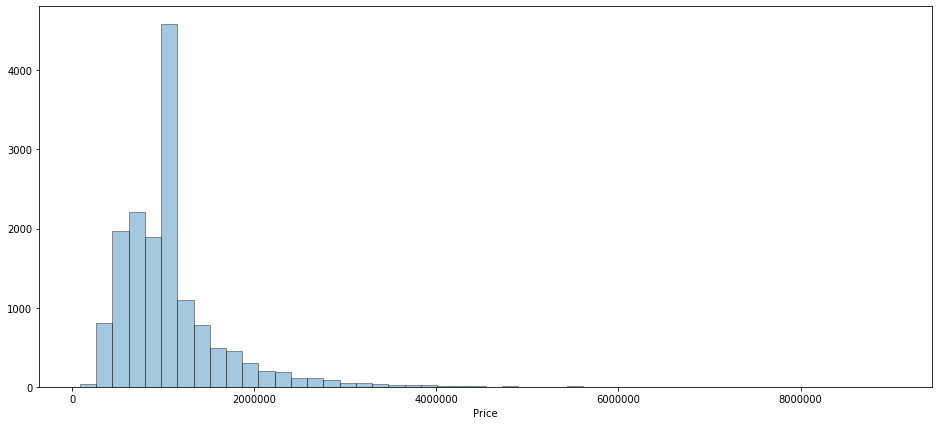

In [29]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="k"))

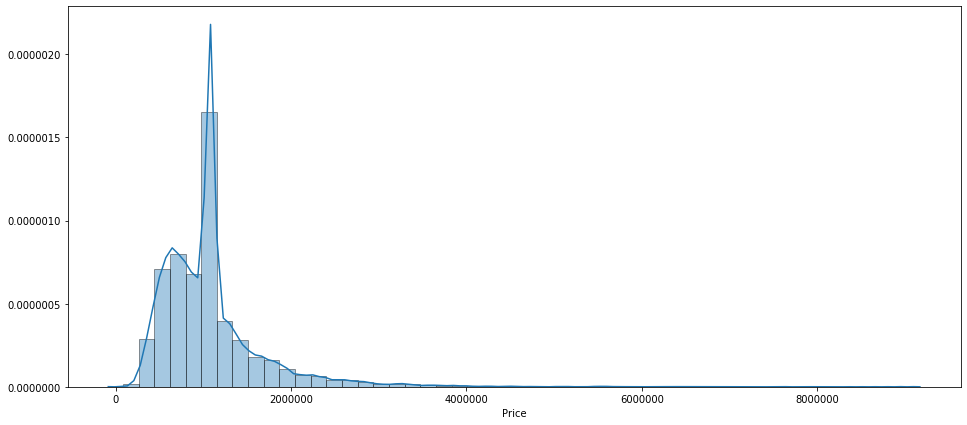

In [30]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], hist_kws=dict(edgecolor="k"))

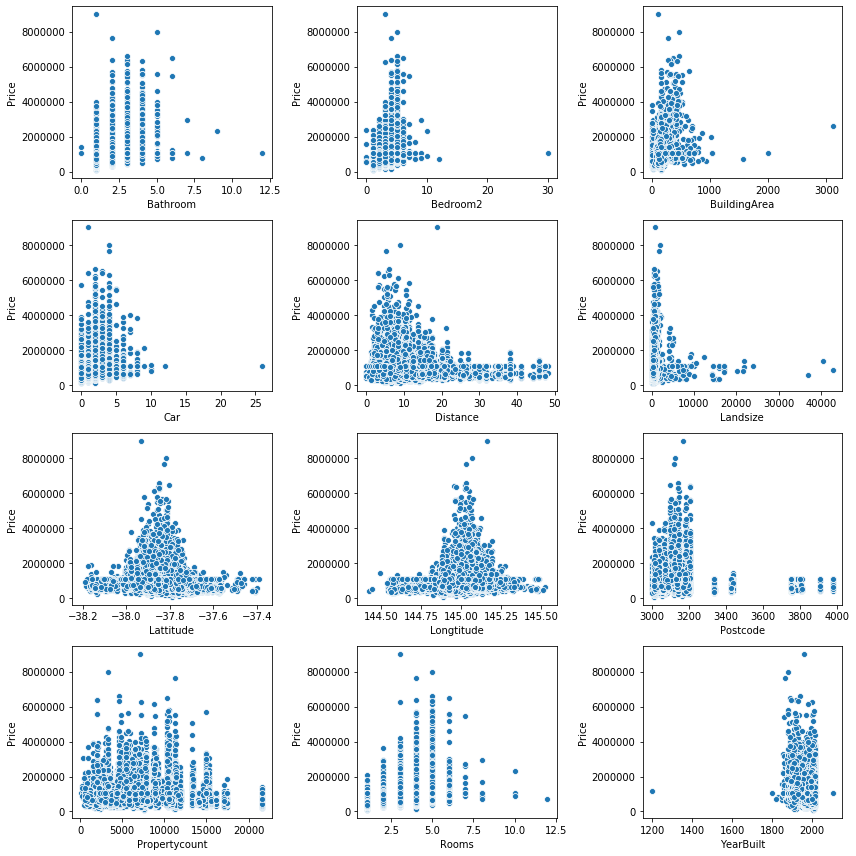

In [31]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for idx, feat in enumerate(numerical.columns.difference(['Price'])):
    ax = axes[int(idx / 3), idx%3]
    sns.scatterplot(x=feat, y='Price', data=numerical, ax=ax);
    ax.set_xlabel(feat)
    ax.set_ylabel('Price')
    
fig.tight_layout();


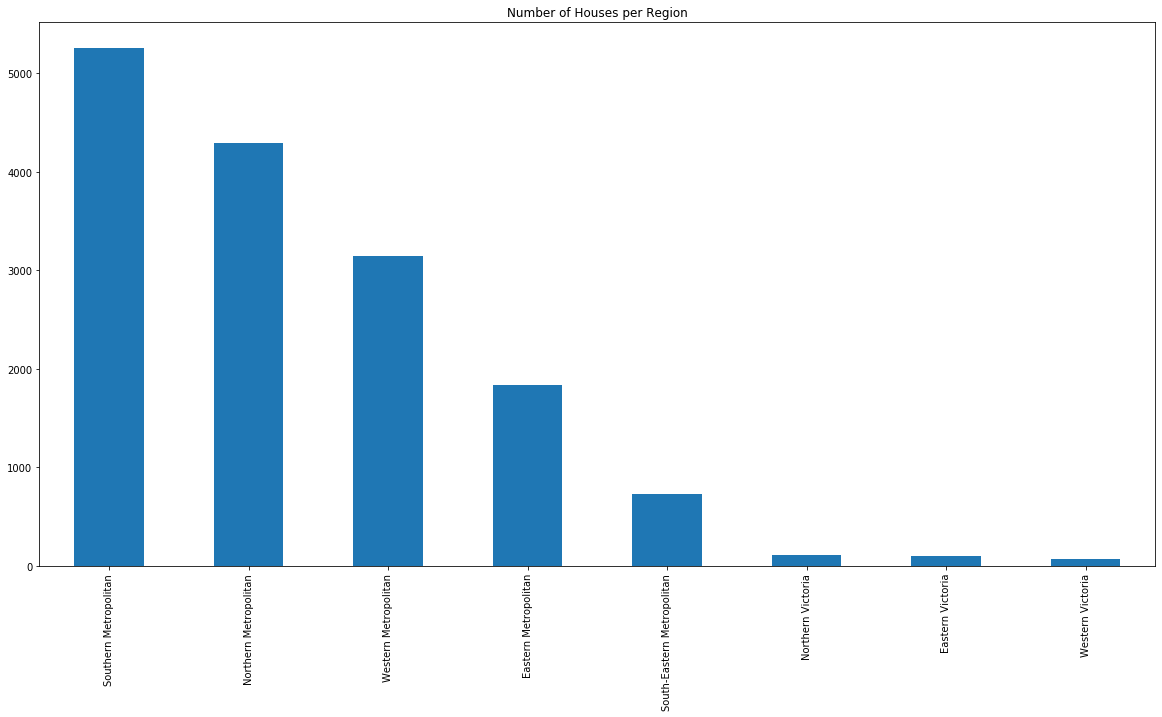

In [32]:
region = data['Regionname'].value_counts()
region.plot.bar(figsize =(20, 10), title = "Number of Houses per Region")

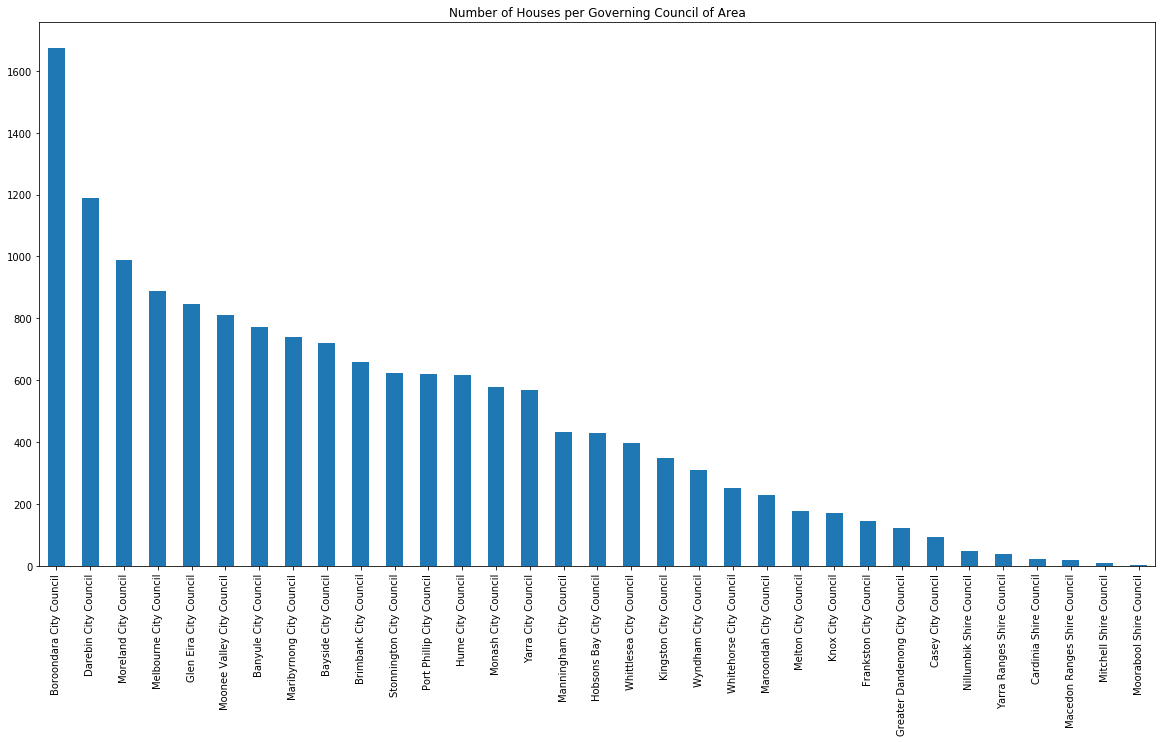

In [33]:
## Council Wise Number of Houses
data['CouncilArea'].value_counts().plot.bar(figsize =(20, 10), title = "Number of Houses per Governing Council of Area")

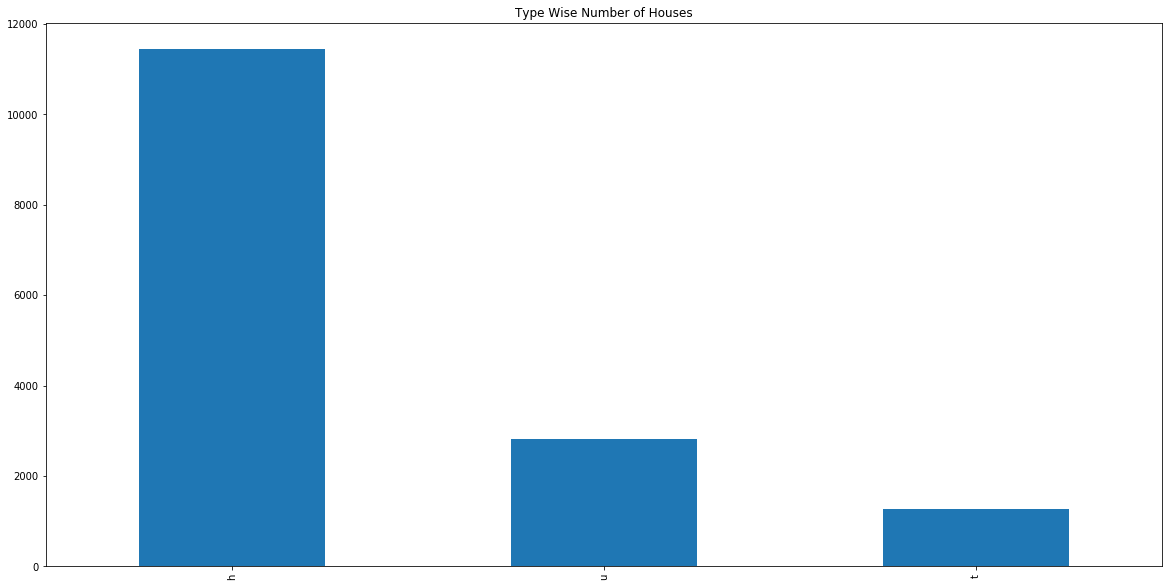

In [34]:
## Type Wise Number of Houses
data['Type'].value_counts().plot.bar(figsize =(20, 10), title = "Type Wise Number of Houses")

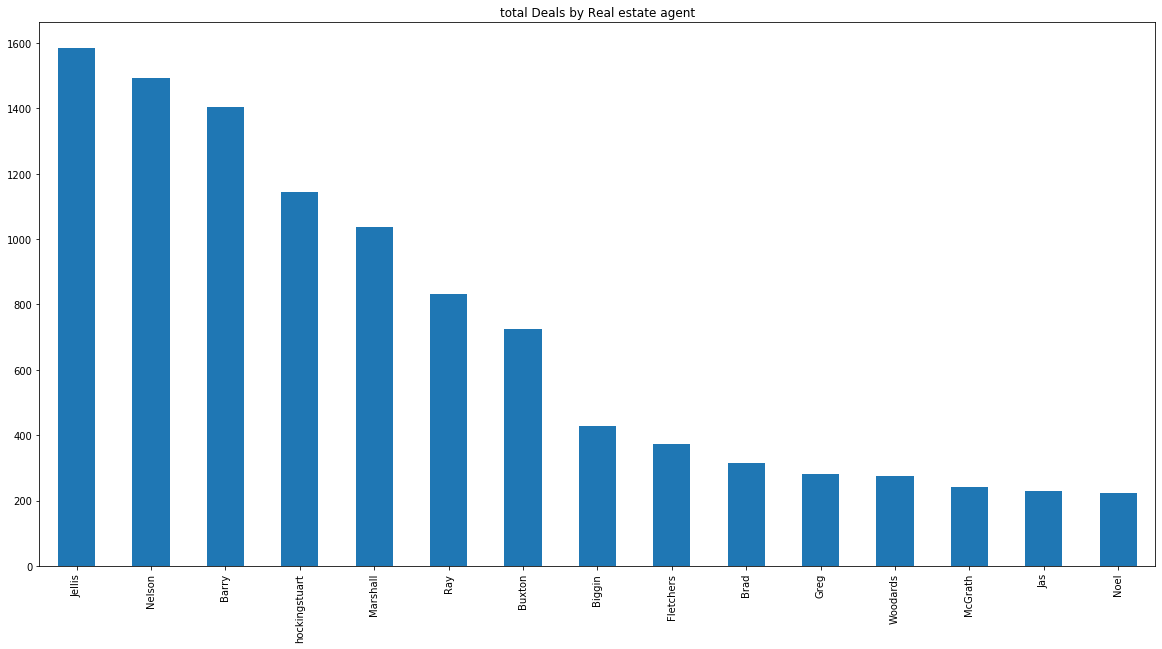

In [35]:
data['SellerG'].value_counts().head(15).plot.bar(figsize =(20, 10), title = "total Deals by Real estate agent")

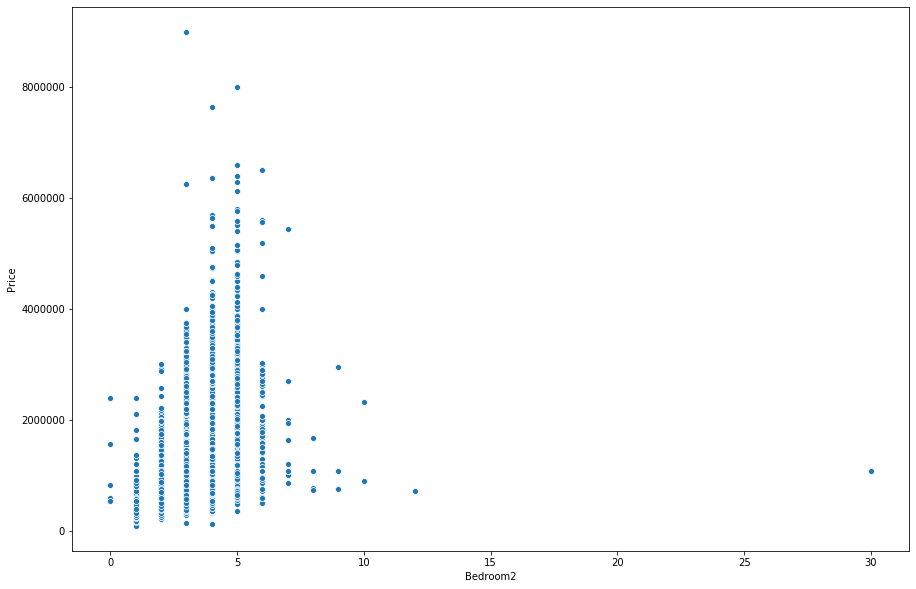

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Bedroom2', y = 'Price', data = data)

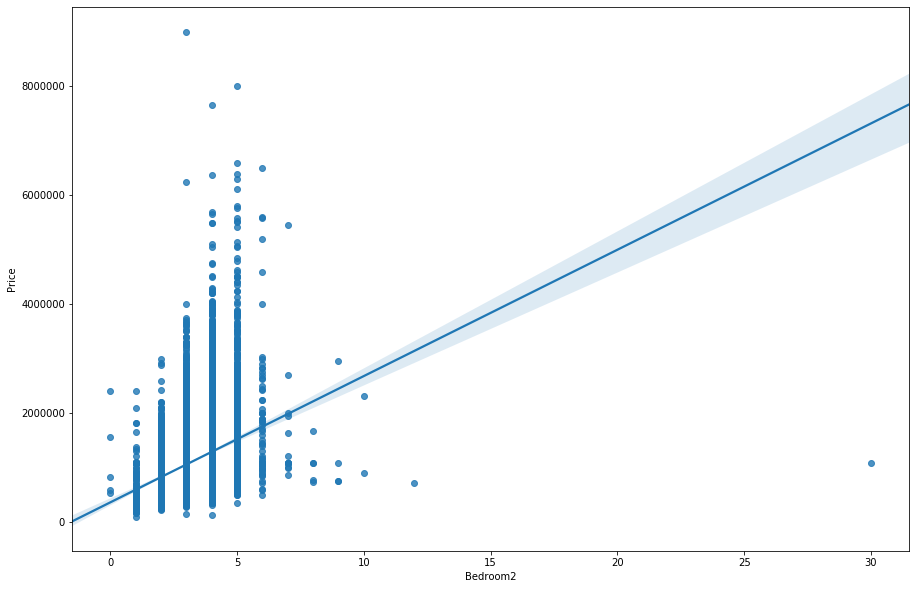

In [37]:
#regression plot for Bedroom2 and Price
plt.figure(figsize=(15,10))
sns.regplot(x = 'Bedroom2', y = 'Price', data = data)

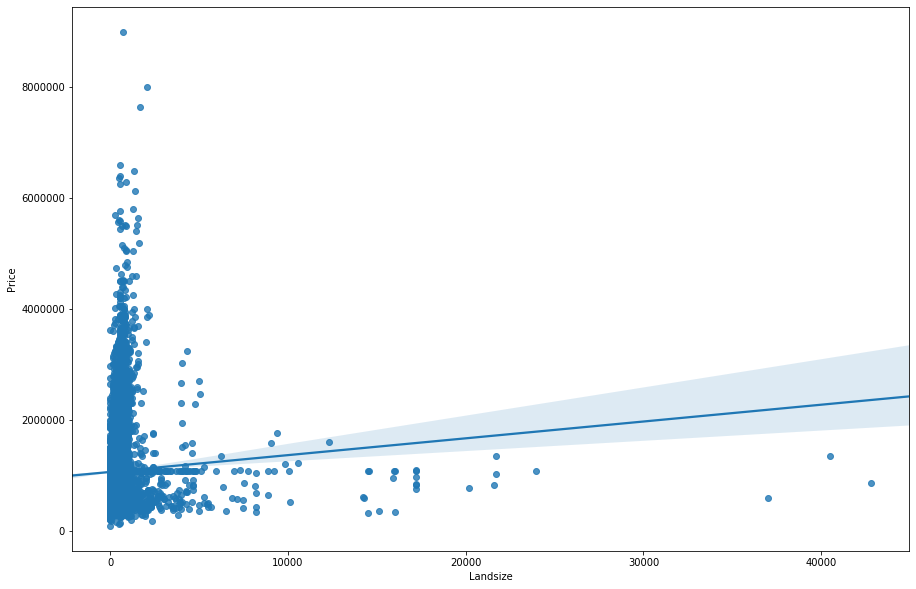

In [38]:
# landsize vs price 
plt.figure(figsize=(15,10))
sns.regplot(x = 'Landsize', y = 'Price', data = data)

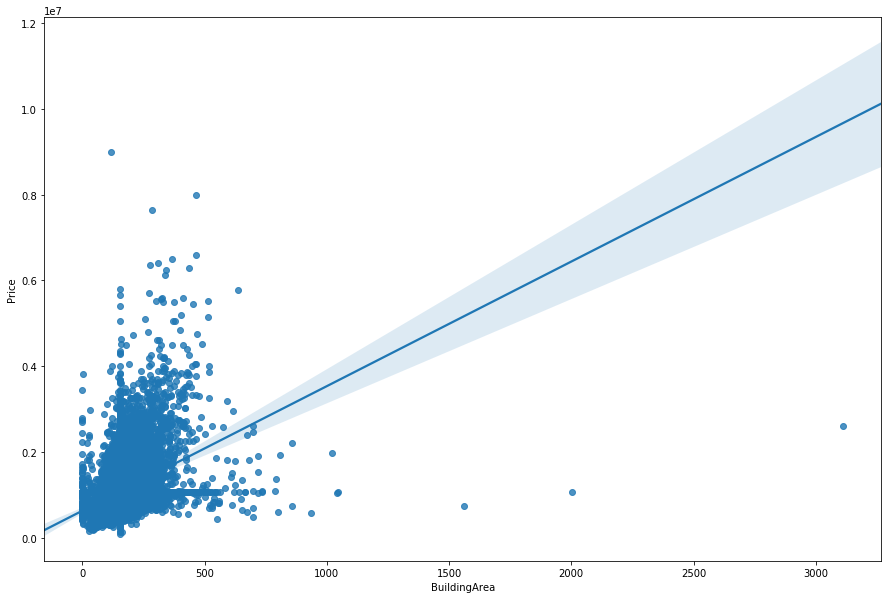

In [39]:
## Built Area (mtrs) vs Price
plt.figure(figsize=(15,10))
sns.regplot(x = 'BuildingArea', y = 'Price', data = data)

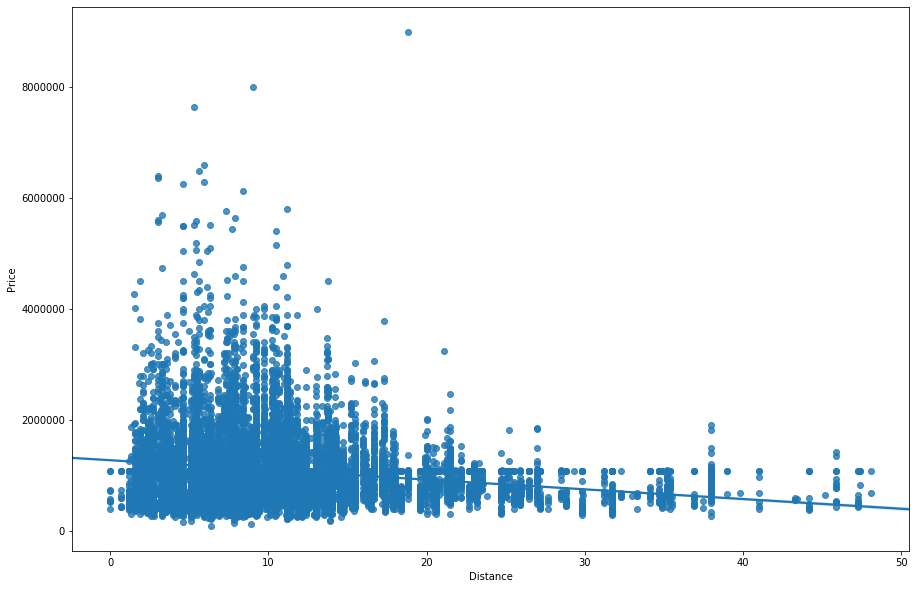

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x = 'Distance', y = 'Price', data = data)

(1800, 2018)

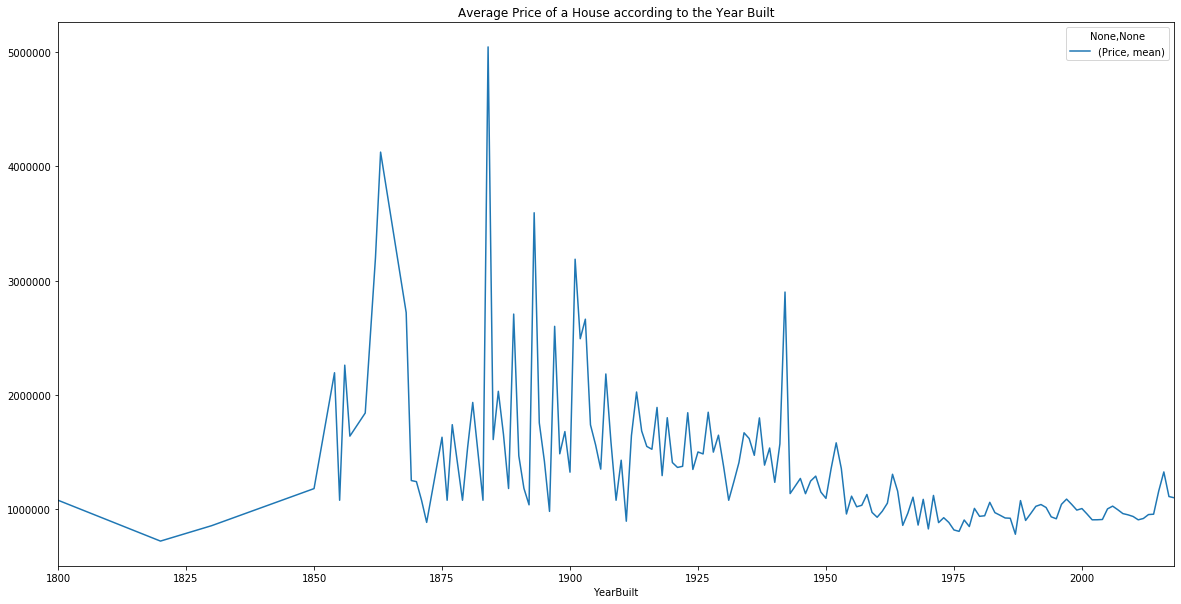

In [41]:
## Year built vs price
yb = pd.DataFrame(data[['YearBuilt', 'Price']].groupby(['YearBuilt']).agg(['mean']))
yb.plot.line(figsize =(20, 10), title = "Average Price of a House according to the Year Built")
plt.xlim([1800, 2018])

In [42]:
data.columns

Index(['Suburb', 'Address', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

Since Date and postcode and adress are not useful for prediction we are removing those columns

In [43]:
data.drop(["Address","Date","Postcode"], axis=1,inplace=True)

In [44]:
data.columns

Index(['Suburb', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

# Label Encoding 

## Converting the categorical data to numerical type

In [45]:
label_encoder = preprocessing.LabelEncoder()
data['Suburb']= label_encoder.fit_transform(data['Suburb'])
data['Type']= label_encoder.fit_transform(data['Type'])
data['Method']= label_encoder.fit_transform(data['Method'])
data['SellerG']= label_encoder.fit_transform(data['SellerG'])
data['Regionname']= label_encoder.fit_transform(data['Regionname'])
data['CouncilArea']= label_encoder.fit_transform(data['CouncilArea'])

# Correlation

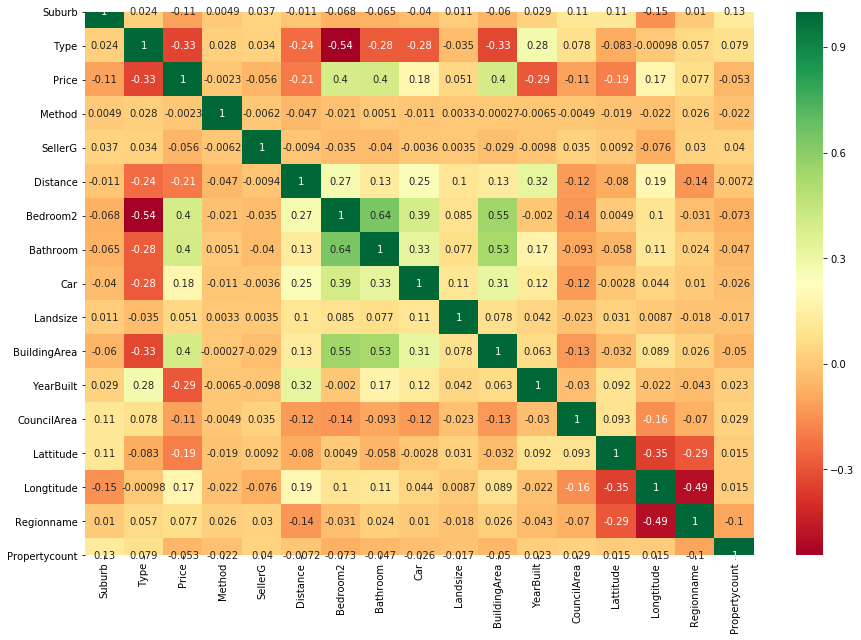

In [46]:
corrmat=data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#  Seperating X and Y 

In [47]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [48]:
X.columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

# Using extra tree regressor model to get feature importance

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

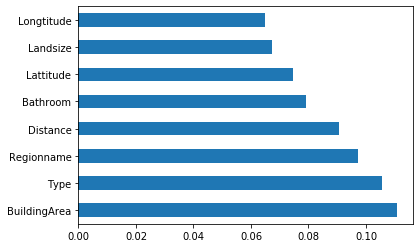

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [51]:
x=data[['Longtitude','YearBuilt','Bathroom','Distance','Lattitude','Type','BuildingArea','Regionname','Landsize']]

# Standardising the data  By using StandardScaler 


In [52]:
# Applying Stnadard scaler to standardsie the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.74372575, -0.56954019, -0.37234115, ..., -0.04664866,
        -0.83597777, -0.81402379],
       [-1.74372575, -0.56954019,  1.13706339, ..., -0.03830143,
        -0.83597777, -0.81402379],
       [-1.74372575, -0.56954019,  2.14333308, ..., -0.0408056 ,
        -0.83597777, -0.81402379],
       ...,
       [ 1.75427838, -0.56954019,  1.13706339, ..., -0.92427609,
         1.12432861, -0.22742014],
       [ 1.75427838,  0.71083361, -0.37234115, ..., -1.00524419,
         1.12432861, -0.22742014],
       [ 1.75427838, -0.56954019, -1.37861085, ..., -0.88045315,
         1.12432861, -0.22742014]])

# Splitting  the dataframe into train and test with 75 to 25 ratio 

In [53]:
# deviding the dataset into train and test with 75 to 25 ratio 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=500)

In [54]:
len(x_train),len(x_test),len(y_train),len(y_test)

(11655, 3886, 11655, 3886)

# Algorithms 


# Linear Regression 

In [55]:
# Fitting  Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [56]:
comp = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
comp.head(10)

,Actual,Predicted
2643,950000.00,1143748.43
28662,1520000.00,1480273.74
12171,1495000.00,1116440.84
32174,1077469.25,1453966.86
32356,730000.00,870046.76
22922,1245000.00,1493582.58
1908,1077469.25,1307405.70
14342,2705000.00,1742698.73
31092,946500.00,1104922.34
14520,1385000.00,1019842.63


In [57]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 290986.9664858374
MSE: 209036306854.55365
RMSE: 457204.8849854446


In [58]:
r2_score(y_test,y_pred)

0.4207146926299493

# XGBoost Regressor 

# XGBoost without Hyper tuning 

In [59]:
xgb = XGBRegressor(min_child_wieght= 1,subsample=1,colsample_bytree = 1,max_depth = 9,random_state=100)

xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

[08:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_child_wieght" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [60]:
print('R^2: ', r2_score(y_test, xgb_pred))

R^2:  0.5143695711647058


In [61]:
print("MAE:", metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 237382.73738494207
MSE: 175240749330.92523
RMSE: 418617.66485771385


# XGBregressor with hyperparameter tuning 

In [62]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'max_depth': [2,3,5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators':[100,200,300], 
              'learning_rate': [0.15,0.2,0.3,0.5], 
              'min_samples_leaf':[1,3,5]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 5, n_jobs = 5, verbose=True)

xgb_grid.fit(x_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  8.1min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 14.4min
[Parallel(n_jobs=5)]: Done 900 out of 900 | elapsed: 17.9min finished


[08:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.570656052143028
{'colsample_bytree': 0.7, 'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 4, 'min_samples_leaf': 1, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [63]:
xgb1_pred=xgb_grid.predict(x_test)

In [64]:
r2_score(y_test,xgb1_pred)

0.5260888515306936

In [65]:
print("MAE:", metrics.mean_absolute_error(y_test, xgb1_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))

MAE: 238081.33048937618
MSE: 171011822659.50485
RMSE: 413535.7574134368


# Gradient Boosting Regressor

In [66]:
gbr = GradientBoostingRegressor()

# defining parameter range 
param_grid={'n_estimators':[100,200], 
            'learning_rate': [0.15,0.2,0.3,0.5],
            'max_depth':[2,3,5], 
            'min_samples_leaf':[1,3,5]}   
  
grid = GridSearchCV(gbr, param_grid, refit = True, verbose = True, n_jobs = -1,cv=5) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [67]:
gbr_pred=grid.predict(x_test)


In [68]:
r2_score(y_test,gbr_pred)

0.5349880020374063

In [69]:
print(grid.best_score_)
print(grid.best_params_)

0.5673345022525964
{'learning_rate': 0.15, 'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 100}


In [70]:
print("MAE:", metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

MAE: 238190.40080926454
MSE: 167800545707.7183
RMSE: 409634.64905659325


# Random Forest Regression 

In [71]:
rfr_model = RandomForestRegressor(random_state=35)

rfr_params_grid = {
    'n_estimators' : [600,750,800,850],
    'max_depth' : [7],
    'max_features': [5],
    'min_samples_leaf' : [3],
    'min_samples_split' : [4, 6 ,9]
}

gs_rfr_cv = GridSearchCV(estimator=rfr_model, 
                                      param_grid=rfr_params_grid,
                                      cv = 5 ,
                                      n_jobs = -1,
                                      verbose = 5)

gs_rfr_cv.fit(x_train, y_train)

gs_rfr_cv_score = gs_rfr_cv.best_score_

gs_rfr_cv_pred = gs_rfr_cv.predict(x_test)

mae = mean_absolute_error(y_test, gs_rfr_cv_pred)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.7min finished


In [72]:
print("MAE:", metrics.mean_absolute_error(y_test, gs_rfr_cv_pred))
print('MSE:', metrics.mean_squared_error(y_test, gs_rfr_cv_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gs_rfr_cv_pred)))

MAE: 260797.1816425344
MSE: 177875634378.2555
RMSE: 421753.0490444088


In [73]:
r2_score(y_test,gs_rfr_cv_pred)

0.5070677286403376